In [122]:
import pandas as pd

In [123]:
pip install vectorizer


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: pip3.13 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [124]:
text_ana = pd.read_excel('text_analysis_twitter_sample.xlsx')

In [125]:
text_ana

,Unnamed: 0,index,id,screen_name,time,link,text,source
0,0,49374,890587249372524544,auctnr1,2017-07-27T10:58:41-04:00,https://www.twitter.com/Reuters/statuses/89058...,"RT @Reuters MORE: Top U.S. general says, given...",Twitter for iPhone
1,1,83246,899354463055618048,SenatorTester,2017-08-20T15:36:27-04:00,https://www.twitter.com/SenatorTester/statuses...,T-minus 2 days until our first-ever Last Best ...,Twitter Web Client
2,2,100988,903272105738985472,KeithRothfus,2017-08-31T11:03:46-04:00,https://www.twitter.com/KeithRothfus/statuses/...,Please know that help is available. Visit http...,Twitter Web Client
3,3,193395,921001114409021440,HASCRepublicans,2017-10-19T09:12:31-04:00,https://www.twitter.com/HASCRepublicans/status...,Literally flying the wings off the A-10 in fig...,Twitter Web Client
4,4,12662,884911451449774080,SteveKnight25,2017-07-11T19:05:05-04:00,https://www.twitter.com/SteveKnight25/statuses...,Today the House unanimously passed my bill #HR...,Twitter Web Client
...,...,...,...,...,...,...,...,...
495,495,108175,905927436315086848,JeffFortenberry,2017-09-07T18:55:06-04:00,https://www.twitter.com/JeffFortenberry/status...,Great conversation with presidential historian...,Twitter Web Client
496,496,157423,915340759154409472,FlakeforSenate,2017-10-03T18:20:17-04:00,https://www.twitter.com/FlakeforSenate/statuse...,ICYMI over the weekend: @JeffFlake teams up wi...,TweetDeck
497,497,72173,896489606316773376,RepSeanMaloney,2017-08-12T17:52:32-04:00,https://www.twitter.com/RepSeanMaloney/statuse...,one of America's most beautiful &amp; welcomin...,Twitter for iPhone
498,498,232181,927641544819081216,ChrisMurphyCT,2017-11-06T15:59:13-05:00,https://www.twitter.com/SenatorDurbin/statuses...,RT @SenatorDurbin 94% of Americans (93% of gun...,Twitter for iPhone


In [126]:
text_ana = text_ana.drop(['Unnamed: 0'], axis=1)

In [127]:
text_ana

,index,id,screen_name,time,link,text,source
0,49374,890587249372524544,auctnr1,2017-07-27T10:58:41-04:00,https://www.twitter.com/Reuters/statuses/89058...,"RT @Reuters MORE: Top U.S. general says, given...",Twitter for iPhone
1,83246,899354463055618048,SenatorTester,2017-08-20T15:36:27-04:00,https://www.twitter.com/SenatorTester/statuses...,T-minus 2 days until our first-ever Last Best ...,Twitter Web Client
2,100988,903272105738985472,KeithRothfus,2017-08-31T11:03:46-04:00,https://www.twitter.com/KeithRothfus/statuses/...,Please know that help is available. Visit http...,Twitter Web Client
3,193395,921001114409021440,HASCRepublicans,2017-10-19T09:12:31-04:00,https://www.twitter.com/HASCRepublicans/status...,Literally flying the wings off the A-10 in fig...,Twitter Web Client
4,12662,884911451449774080,SteveKnight25,2017-07-11T19:05:05-04:00,https://www.twitter.com/SteveKnight25/statuses...,Today the House unanimously passed my bill #HR...,Twitter Web Client
...,...,...,...,...,...,...,...
495,108175,905927436315086848,JeffFortenberry,2017-09-07T18:55:06-04:00,https://www.twitter.com/JeffFortenberry/status...,Great conversation with presidential historian...,Twitter Web Client
496,157423,915340759154409472,FlakeforSenate,2017-10-03T18:20:17-04:00,https://www.twitter.com/FlakeforSenate/statuse...,ICYMI over the weekend: @JeffFlake teams up wi...,TweetDeck
497,72173,896489606316773376,RepSeanMaloney,2017-08-12T17:52:32-04:00,https://www.twitter.com/RepSeanMaloney/statuse...,one of America's most beautiful &amp; welcomin...,Twitter for iPhone
498,232181,927641544819081216,ChrisMurphyCT,2017-11-06T15:59:13-05:00,https://www.twitter.com/SenatorDurbin/statuses...,RT @SenatorDurbin 94% of Americans (93% of gun...,Twitter for iPhone


数据预处理

In [128]:
import re  # Ensure the 're' module is imported

def preprocess_text(text):
    # 转换大小写
    text = text.lower()

    # 移除URL
    text = re.sub(r'http\S+', '', text)

    # 移除特殊字符和数字
    #text = re.sub(r'[^a-zA-Z\s]', '', text)

    # 移除多余的空格
    #text = re.sub(r'\s+', ' ', text).strip()

    # 移除停用词
    stop_words = set([
    'to', 'of', 'rt', 'is', 'the', 'com', 'in', 'for', 'and', 'on', 'with', 
    'i', 'me', 'my', 'myself', 'we', 'our', 'you', 'he', 'him', 'his', 'himself', 
    'she', 'her', 'this', 'at', 'it', 'qt', 'be', 'that', 'are', 'from', 'as', 
    'have', 'be', 'by', 'amp', '&amp;'])
    text = ' '.join([word for word in text.split() if word not in stop_words])  # 移除停用词
    return text

In [129]:
text_ana['text'].apply(preprocess_text)

0      @reuters more: top u.s. general says, given ch...
1      t-minus 2 days until first-ever last best outd...
2      please know help available. visit or call @sam...
3      literally flying wings off a-10 fight against ...
4      today house unanimously passed bill #hr2156 wh...
                             ...                        
495    great conversation presidential historian mich...
496    icymi over weekend: @jeffflake teams up arizon...
497    one america's most beautiful welcoming communi...
498    @senatordurbin 94% americans (93% gun owners) ...
499    @vvamerica "the #forevergibill shows just how ...
Name: text, Length: 500, dtype: object

构建词袋模型

In [130]:
from sklearn.feature_extraction.text import CountVectorizer

#初始化
vectorizer = CountVectorizer()

# 将文本数据转化为词袋特征矩阵
X = vectorizer.fit_transform(text_ana["text"].apply(preprocess_text))

#展示特征矩阵的形状
print('词袋特征矩阵的形状：', X.shape)

#展示词袋模型中的所有特征词
print('特征词列表:', vectorizer.get_feature_names_out())

词袋特征矩阵的形状： (500, 3558)
特征词列表: ['00' '000' '00am' ... 'zinke' 'zone' 'пенсионер']


In [131]:
len(vectorizer.get_feature_names_out())

3558

In [132]:
X

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 7722 stored elements and shape (500, 3558)>

In [133]:
feature_words = vectorizer.get_feature_names_out()

In [134]:
feature_words.shape

(3558,)

In [135]:
X.sum(axis=0).shape

(1, 3558)

In [136]:
X.sum(axis=0)[0]

matrix([[2, 4, 1, ..., 2, 1, 1]], shape=(1, 3558))

In [137]:
#计算词频统计
word_freq = dict(zip(feature_words, X.sum(axis=0).A1))

In [138]:
word_freq

{'00': np.int64(2),
 '000': np.int64(4),
 '00am': np.int64(1),
 '10': np.int64(10),
 '100': np.int64(4),
 '100th': np.int64(1),
 '106': np.int64(1),
 '10thamendment': np.int64(1),
 '11': np.int64(3),
 '115': np.int64(1),
 '118': np.int64(1),
 '12': np.int64(5),
 '126': np.int64(1),
 '13': np.int64(2),
 '1386': np.int64(1),
 '14': np.int64(1),
 '1404': np.int64(1),
 '14th': np.int64(1),
 '15': np.int64(3),
 '153': np.int64(1),
 '15am': np.int64(1),
 '15k': np.int64(1),
 '16': np.int64(1),
 '17': np.int64(2),
 '18': np.int64(2),
 '180': np.int64(1),
 '188': np.int64(1),
 '1888': np.int64(1),
 '189': np.int64(1),
 '19': np.int64(1),
 '194': np.int64(1),
 '1942': np.int64(1),
 '1948': np.int64(1),
 '1967': np.int64(1),
 '1979': np.int64(1),
 '1982': np.int64(1),
 '1984': np.int64(1),
 '1october': np.int64(1),
 '1st': np.int64(2),
 '20': np.int64(5),
 '200': np.int64(1),
 '2017': np.int64(5),
 '2018': np.int64(2),
 '20t': np.int64(1),
 '20th': np.int64(1),
 '21airract': np.int64(2),
 '21st'

In [139]:
word_freq.items()

dict_items([('00', np.int64(2)), ('000', np.int64(4)), ('00am', np.int64(1)), ('10', np.int64(10)), ('100', np.int64(4)), ('100th', np.int64(1)), ('106', np.int64(1)), ('10thamendment', np.int64(1)), ('11', np.int64(3)), ('115', np.int64(1)), ('118', np.int64(1)), ('12', np.int64(5)), ('126', np.int64(1)), ('13', np.int64(2)), ('1386', np.int64(1)), ('14', np.int64(1)), ('1404', np.int64(1)), ('14th', np.int64(1)), ('15', np.int64(3)), ('153', np.int64(1)), ('15am', np.int64(1)), ('15k', np.int64(1)), ('16', np.int64(1)), ('17', np.int64(2)), ('18', np.int64(2)), ('180', np.int64(1)), ('188', np.int64(1)), ('1888', np.int64(1)), ('189', np.int64(1)), ('19', np.int64(1)), ('194', np.int64(1)), ('1942', np.int64(1)), ('1948', np.int64(1)), ('1967', np.int64(1)), ('1979', np.int64(1)), ('1982', np.int64(1)), ('1984', np.int64(1)), ('1october', np.int64(1)), ('1st', np.int64(2)), ('20', np.int64(5)), ('200', np.int64(1)), ('2017', np.int64(5)), ('2018', np.int64(2)), ('20t', np.int64(1)), 

词频统计

In [140]:
#观察词袋模型的词频统计结果   
sorted(word_freq.items(), key=lambda  x: x[1], reverse=True)

[('trump', np.int64(41)),
 ('tax', np.int64(40)),
 ('who', np.int64(40)),
 ('today', np.int64(38)),
 ('will', np.int64(37)),
 ('not', np.int64(36)),
 ('here', np.int64(32)),
 ('all', np.int64(30)),
 ('your', np.int64(30)),
 ('an', np.int64(28)),
 ('new', np.int64(28)),
 ('bill', np.int64(27)),
 ('thank', np.int64(27)),
 ('their', np.int64(27)),
 ('what', np.int64(27)),
 ('about', np.int64(26)),
 ('it', np.int64(26)),
 ('more', np.int64(26)),
 ('us', np.int64(26)),
 ('get', np.int64(25)),
 ('has', np.int64(25)),
 ('must', np.int64(25)),
 ('need', np.int64(25)),
 ('great', np.int64(23)),
 ('help', np.int64(23)),
 ('house', np.int64(23)),
 ('people', np.int64(23)),
 ('work', np.int64(23)),
 ('health', np.int64(22)),
 ('they', np.int64(22)),
 ('was', np.int64(22)),
 ('can', np.int64(21)),
 ('families', np.int64(21)),
 ('just', np.int64(21)),
 ('up', np.int64(21)),
 ('americans', np.int64(20)),
 ('congress', np.int64(20)),
 ('day', np.int64(20)),
 ('one', np.int64(20)),
 ('support', np.int6

词云图

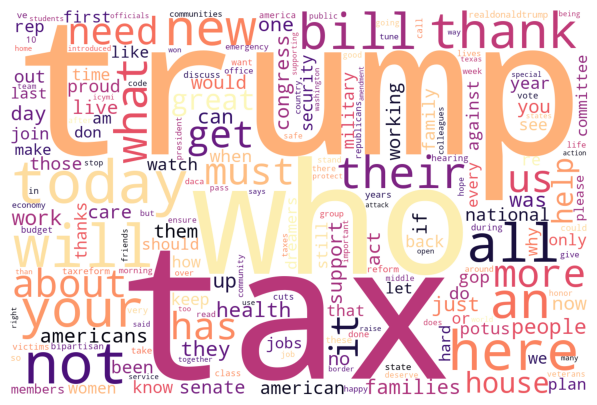

In [142]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
#根据词袋模型分析结果绘制词云图
wc = WordCloud(
width=1200, height=800,
max_words=200,
colormap='magma',
background_color='white',
#font_path='STHeiti Medium.ttc'  # 使用黑体字体
).generate_from_frequencies(word_freq)
#显示词云图
plt.figure(figsize=(10, 5))
plt.imshow(wc)
plt.axis('off')
# plt.savefig('wordcloud_twi.png', dpi=100)
plt.show()